### Так как проекции ускорения на оси координат нам известны из условия, найдем проекции вектора скорости по следующим формулам:
$$
\Large v_x = d^{2}x * Δt + v_{x0}
$$
$$
\Large  v_y = d^{2}y * Δt + v_{y0}
$$
### где  $ v_{x0} = -4/5 $, $ v_{y0} = -3/5 $.

### По схожей логике, получим координаты маятника по прошествию $ Δt $:
$$
\Large x = v_x * Δt + x_{0}
$$
$$
\Large y = v_y * Δt + y_{0}
$$
### где  $ x_{0} = 3 $, $ y_{0} = -4 $.

### Преобразив формулы, получим систему из трёх уравнений 
$$ \Large x = -\frac{T Δt^2 x_{0}}{L}+{Δt}*{v_{x0}} + x_{0} $$,
$$ \Large y = -\frac{T Δt^2 y_{0}}{L}+Δt*v_{y0} - Δt^2*g(t) + y_{0} $$.
$$ \Large x^2 + y^2 = L^2 $$
### с тремя неизвестными $ x, y, T $. 

### Присвоим $ Δt $ какое-либо маленькое значение, на каждом шаге будем обновлять счетчик времени $ t = t + Δt $ и решать данную систему уравнений.

In [4]:
import numpy as np

def g(t):
    return 9.81+0.05*np.sin(2*np.pi*t)
    
def solve_for_T(dt, vx0, vy0, x0, y0, g):
    T = -(5*np.sqrt((25-dt**2*vx0**2)*y0**2+(2*dt**2*vx0*vy0-2*dt**3*g*vx0)*x0*y0+(-dt**2*vy0**2+2*dt**3*g*vy0-dt**4*g**2+25)*x0**2)-5*y0**2+(5*dt**2*g-5*dt*vy0)*y0-5*x0**2-5*dt*vx0*x0)/(dt**2*y0**2+dt**2*x0**2) 
    return T

# Initial conditions
L = 5
vx0, vy0, x0, y0 = -4/5, -3/5, 3, -4

vx, vy, x, y = vx0, vy0, x0, y0
t, dt = 0, 0.01
gkeys, gvalues = [], []

while t < 100:
    t += dt
    g_ = g(t)
    T = solve_for_T(dt, vx, vy, x, y, g_)
    ax = -x/L*T
    ay = -y/L*T - g_
    vx = ax * dt + vx
    vy = ay * dt + vy
    x = vx * dt + x
    y = vy * dt + y
    
    gkeys.append(t)
    gvalues.append(np.sqrt(x**2+y**2))
    
    if t > 99.75 or t < 0.25:
        print(f"t={t:.2f}, x={x:.4f}, y={y:.4f}")

t=0.01, x=2.9915, y=-4.0063
t=0.02, x=2.9826, y=-4.0130
t=0.03, x=2.9731, y=-4.0200
t=0.04, x=2.9632, y=-4.0274
t=0.05, x=2.9528, y=-4.0350
t=0.06, x=2.9418, y=-4.0430
t=0.07, x=2.9304, y=-4.0512
t=0.08, x=2.9185, y=-4.0598
t=0.09, x=2.9062, y=-4.0687
t=0.10, x=2.8933, y=-4.0779
t=0.11, x=2.8799, y=-4.0873
t=0.12, x=2.8660, y=-4.0971
t=0.13, x=2.8517, y=-4.1071
t=0.14, x=2.8368, y=-4.1173
t=0.15, x=2.8214, y=-4.1279
t=0.16, x=2.8056, y=-4.1387
t=0.17, x=2.7892, y=-4.1497
t=0.18, x=2.7724, y=-4.1610
t=0.19, x=2.7550, y=-4.1725
t=0.20, x=2.7371, y=-4.1843
t=0.21, x=2.7188, y=-4.1962
t=0.22, x=2.6999, y=-4.2084
t=0.23, x=2.6805, y=-4.2208
t=0.24, x=2.6606, y=-4.2333
t=99.75, x=-1.6051, y=-4.7354
t=99.76, x=-1.5676, y=-4.7479
t=99.77, x=-1.5298, y=-4.7602
t=99.78, x=-1.4915, y=-4.7724
t=99.79, x=-1.4529, y=-4.7843
t=99.80, x=-1.4139, y=-4.7959
t=99.81, x=-1.3745, y=-4.8074
t=99.82, x=-1.3348, y=-4.8185
t=99.83, x=-1.2948, y=-4.8295
t=99.84, x=-1.2544, y=-4.8401
t=99.85, x=-1.2137, y=-4.850

### Построим график длины маятника в зависимости от времени $ t $.

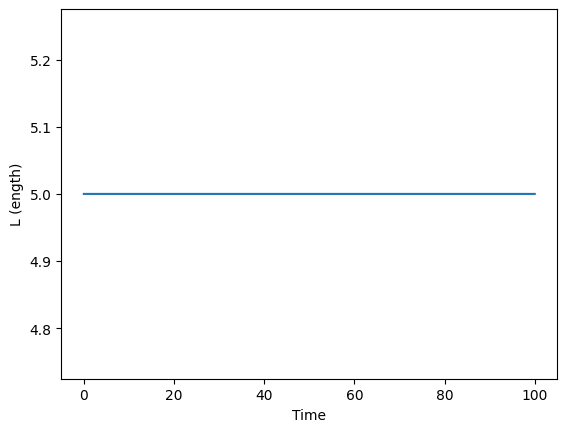

In [5]:
import matplotlib.pyplot as plt
plt.plot(gkeys, gvalues)
plt.ylabel('L (ength)')
plt.xlabel('Time')
plt.show()